# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

# Importing preprocessed data

In [2]:
filename='Preprocessed_DM_xx.csv'
data=pd.read_csv(filename, index_col=0)
data_parent=data

In [3]:
data.head(10)

,Current.age,Sex,Currently.has.asthma,Currently.has.thyroid.disorder,Currently.has.heart.disease,Currently.has.cancer,Suffers.from.TB,SBP_status,First.SYSTOLIC.reading,First.DIASTOLIC.reading,...,Has.motorcycle.scooter,Has.car.truck,Type.of.cooking.fuel,Household.structure,Owns.livestock..herds.or.farm.animals,Source.of.drinking.water,Time.to.get.to.water.source..minutes.,Glucose.level,DM_status,DM_history
1,47,1,0.0,0.0,0.0,0.0,0,0,112.0,74.0,...,1,1,3,0,0,3,0,78.0,0,0.0
2,46,1,1.0,1.0,0.0,0.0,0,0,120.0,86.0,...,1,0,3,1,0,3,0,97.0,0,0.0
3,42,0,0.0,0.0,0.0,0.0,0,0,128.0,74.0,...,0,0,4,0,0,3,0,138.0,0,0.0
4,41,1,0.0,0.0,0.0,0.0,0,0,117.0,82.0,...,0,0,4,0,0,3,0,128.0,1,1.0
5,51,0,0.0,0.0,0.0,0.0,0,0,124.0,88.0,...,1,1,3,1,0,3,0,102.0,0,0.0
6,42,1,0.0,0.0,0.0,0.0,0,0,112.0,76.0,...,1,1,3,1,0,3,0,106.0,0,0.0
7,20,0,0.0,0.0,0.0,0.0,0,0,113.0,60.0,...,1,1,3,1,0,3,0,96.0,0,0.0
8,17,0,0.0,0.0,0.0,0.0,0,0,115.0,67.0,...,1,1,3,1,0,3,0,96.0,0,0.0
11,22,1,0.0,0.0,0.0,0.0,0,0,121.0,72.0,...,1,0,3,0,0,3,0,100.0,0,0.0
12,27,0,0.0,0.0,0.0,0.0,0,0,118.0,92.0,...,1,0,3,0,0,3,0,92.0,0,0.0


In [4]:
data=data.drop(["Hb_adjust_alt_smok","Second.SYSTOLIC.reading","Second.DIASTOLIC.reading","Third.SYSTOLIC.reading","Third.DIASTOLIC.reading","Hb_status","Glucose.level",'SBP_status','DM_status'], axis=1)

In [5]:
data=data.loc[data['BMI'] != 99.99]
data=data.loc[data['Hemoglobin.level..g.dl...1.decimal.'] != 99.99]
data=data.loc[data['Currently.has.asthma'] != .5]
data=data.loc[data['Currently.has.thyroid.disorder'] != .5]
data=data.loc[data['Currently.has.heart.disease'] != .5]
data=data.loc[data['Currently.has.cancer'] != .5]
data=data.loc[data['DM_history'] == 1]
data=data.loc[data['Type.of.caste.or.tribe.of.the.household.head'] != 0]
data=data.loc[data['Time.to.get.to.water.source..minutes.'] != -1]


In [6]:
data=data.drop(['DM_history'], axis=1)

In [7]:
data.head(10)

,Current.age,Sex,Currently.has.asthma,Currently.has.thyroid.disorder,Currently.has.heart.disease,Currently.has.cancer,Suffers.from.TB,First.SYSTOLIC.reading,First.DIASTOLIC.reading,Currently.taking.a.prescribed.medicine.to.lower.BP,...,Type.of.caste.or.tribe.of.the.household.head,Has.refrigerator,Has.bicycle,Has.motorcycle.scooter,Has.car.truck,Type.of.cooking.fuel,Household.structure,Owns.livestock..herds.or.farm.animals,Source.of.drinking.water,Time.to.get.to.water.source..minutes.
4,41,1,0.0,0.0,0.0,0.0,0,117.0,82.0,0,...,2,1,0,0,0,4,0,0,3,0
53,38,1,0.0,0.0,0.0,0.0,0,138.0,90.0,1,...,4,1,0,1,0,3,0,1,3,0
59,47,1,0.0,0.0,0.0,0.0,0,124.0,90.0,0,...,1,1,1,1,1,3,0,0,3,0
81,49,1,0.0,0.0,0.0,0.0,0,138.0,88.0,1,...,2,1,0,1,1,3,0,0,3,0
120,26,1,0.0,0.0,0.0,0.0,0,112.0,69.0,0,...,2,1,0,1,1,1,0,0,3,0
142,47,1,0.0,0.0,0.0,0.0,0,111.0,79.0,0,...,4,1,0,1,1,3,1,0,3,0
175,44,1,0.0,0.0,0.0,0.0,0,156.0,106.0,0,...,4,0,0,1,1,3,1,0,3,0
189,46,1,0.0,0.0,0.0,0.0,0,139.0,91.0,0,...,1,1,0,1,0,3,1,0,3,0
192,40,1,0.0,0.0,0.0,0.0,0,86.0,52.0,0,...,2,1,0,1,0,3,1,1,3,0
197,40,1,0.0,0.0,0.0,0.0,0,128.0,89.0,1,...,4,1,0,1,0,3,1,0,3,0


## Adding a new feature 'Hypertension' 

A new feature 'HTN' (for Hypertension) was added calculated from 3 related features. These three features are then removed

In [8]:
data=data.reset_index(drop=True)
HTN_indexes=data.loc[(data['Currently.taking.a.prescribed.medicine.to.lower.BP'] != 0) | (data['First.SYSTOLIC.reading'] >= 140) | (data['First.DIASTOLIC.reading'] >= 90) ].index.values
HTN_cols=np.zeros(data.shape[0])
HTN_cols[[HTN_indexes]]=1

In [9]:
data['HTN']=HTN_cols

In [10]:
data=data.drop(["First.SYSTOLIC.reading","First.DIASTOLIC.reading","Currently.taking.a.prescribed.medicine.to.lower.BP"], axis=1)

In [11]:
data=data.reset_index(drop=True)

In [12]:
data.columns

Index(['Current.age', 'Sex', 'Currently.has.asthma',
       'Currently.has.thyroid.disorder', 'Currently.has.heart.disease',
       'Currently.has.cancer', 'Suffers.from.TB', 'BMI',
       'Hemoglobin.level..g.dl...1.decimal.', 'Frequency.takes.milk.or.curd',
       'Frequency.eats.pulses.or.beans',
       'Frequency.eats.dark.green.leafy.vegetable', 'Frequency.eats.fruits',
       'Frequency.eats.eggs', 'Frequency.eats.fish',
       'Frequency.eats.chicken.or.meat', 'Frequency.eats.fried.food',
       'Frequency.takes.aerated.drinks', 'Drinks.alcohol',
       'Type.of.alcohol.usually.consumed..Tadi.madi',
       'Type.of.alcohol.usually.consumed..country.liquor',
       'Type.of.alcohol.usually.consumed..beer',
       'Type.of.alcohol.usually.consumed..wine',
       'Type.of.alcohol.usually.consumed..hard.liquor', 'Smoking_stat',
       'Frequency.household.members.smoke.inside.the.house',
       'Type.of.place.of.residence', 'Wealth.index',
       'Highest.educational.level', 'Househ

Feature-wise tags for discrete features used in the analysis:
- 'Household.head.s.religion': {"Hindu": 0, "Muslim": 1, 'Christian': 2, 'Sikh': 3, 'Buddhist/Neo-Buddhist': 3, 'other': 3, 'Jain': 3, 'No religion': 3, 'Parsi/Zoroastrian': 3, 'Jewish': 3}   
- 'Type.of.caste.or.tribe.of.the.household.head': {"Don't know": 0, "Other Backward Class": 1, 'Scheduled caste': 2, 'Scheduled tribe': 3, 'None of above': 4}
- "Has.refrigerator": {"Yes": 1, "No": 0}
- "Has.bicycle": {"Yes": 1, "No": 0}
- 'Has.motorcycle.scooter': {"Yes": 1, "No": 0}
- 'Has.car.truck': {"Yes": 1, "No": 0}
- 'Type.of.cooking.fuel': {"Wood": 1, 'Straw/shrubs/grass': 1, 'Agricultural crop': 2, "Animal dung": 2, 'Coal, lignite': 2       , 'Charcoal': 2, 'Kerosene': 3, 'LPG, natural gas': 3, 'Biogas': 3,'Electricity': 4, 'Other': 0, 'No food cooked in house': 0}
- 'Household.structure': {"Non-nuclear": 0, "Nuclear": 1}
- 'Owns.livestock..herds.or.farm.animals': {"Yes": 1, "No": 0}
- 'Source.of.drinking.water': {"Rainwater": 1, 'Unprotected spring': 1, 'Unprotected well': 1, 'River/dam/lake/ponds/stream/canal/irrigation channel': 1, "Cart with small tank": 2, 'Protected well': 2, 'Tanker truck': 2, 'Protected spring': 2, 'Tube well or borehole': 2, 'Community RO Plant': 3, 'Piped into dwelling': 3, 'Public tap/standpipe': 3, 'Piped to yard/plot': 3, 'Bottled water': 4, 'Other': 0}
- "Sex": {"Female": 1, "Male": 0}
- "Currently.taking.a.prescribed.medicine.to.lower.BP": {"Yes": 1, "No": 0}
- "Currently.has.asthma": {"Yes": 1, "Don't know": 0.5 ,"No": 0}
- "Currently.has.thyroid.disorder": {"Yes": 1, "Don't know": 0.5 ,"No": 0}
- "Currently.has.heart.disease": {"Yes": 1, "Don't know": 0.5 ,"No": 0}
- "Currently.has.cancer": {"Yes": 1, "Don't know": 0.5 ,"No": 0}
- "Hb_status": {"Normal": 0, "Mild Anaemia": 1, "Moderate Anaemia": 2, "Severe Anaemia": 3 }
- "Suffers.from.TB": {"Not listed as suffering from TB": 0, "Yes": 1}
- "Frequency.takes.milk.or.curd": {"Never": 0, "Occasionally": 1 ,"Weekly": 2, "Daily": 3 }
- "Frequency.eats.pulses.or.beans": {"Never": 0, "Occasionally": 1 ,"Weekly": 2, "Daily": 3 }
- "Frequency.eats.dark.green.leafy.vegetable": {"Never": 0, "Occasionally": 1 ,"Weekly": 2, "Daily": 3 }
- "Frequency.eats.fruits": {"Never": 0, "Occasionally": 1 ,"Weekly": 2, "Daily": 3 }
- "Frequency.eats.fish": {"Never": 0, "Occasionally": 1 ,"Weekly": 2, "Daily": 3 }
- "Frequency.eats.eggs": {"Never": 0, "Occasionally": 1 ,"Weekly": 2, "Daily": 3 }
- "Frequency.eats.chicken.or.meat": {"Never": 0, "Occasionally": 1 ,"Weekly": 2, "Daily": 3 }
- "Frequency.eats.fried.food": {"Never": 0, "Occasionally": 1 ,"Weekly": 2, "Daily": 3 }
- "Frequency.takes.aerated.drinks": {"Never": 0, "Occasionally": 1 ,"Weekly": 2, "Daily": 3}
- "Drinks.alcohol": {"Yes": 1, "No": 0}
- "Type.of.place.of.residence": {"Rural": 1, "Urban": 0}
- "Highest.educational.level": {"No education": 0, "Primary": 1 ,"Secondary": 2, "Higher": 3 }
- "Frequency.household.members.smoke.inside.the.house": {"Never": 0, "Weekly": 1, "Less than monthly": 2,"Monthly": 3, "Daily": 4 }
- "Smoking_stat": {"Non-smoker": 0, "Smoker": 1}
- 'Wealth.index': {'Poorest':0,"Poorer": 1, "Middle": 2 ,"Richer": 3, "Richest": 4}

## Dividing data types

- bf=ordinal discrete features
- cf=continuous features
- dnbf= nominal discrete features

In [13]:
data_bf=data[[ 'Currently.has.asthma',
       'Currently.has.thyroid.disorder', 'Currently.has.heart.disease',
       'Currently.has.cancer', 'Suffers.from.TB','HTN','Drinks.alcohol', 'Smoking_stat','Has.refrigerator',
       'Has.bicycle', 'Has.motorcycle.scooter', 'Has.car.truck', 'Owns.livestock..herds.or.farm.animals','Frequency.takes.milk.or.curd',
       'Frequency.eats.pulses.or.beans',
       'Frequency.eats.dark.green.leafy.vegetable', 'Frequency.eats.fruits',
       'Frequency.eats.eggs', 'Frequency.eats.fish',
       'Frequency.eats.chicken.or.meat', 'Frequency.eats.fried.food',
       'Frequency.takes.aerated.drinks','Frequency.household.members.smoke.inside.the.house','Wealth.index',
       'Highest.educational.level' ]]

In [14]:
data_cf=data[['Current.age','BMI','Hemoglobin.level..g.dl...1.decimal.','Time.to.get.to.water.source..minutes.']]

In [15]:
data_dnbf=data[['Household.head.s.religion', 'Sex', 'Type.of.place.of.residence', 'Household.structure',
       'Type.of.caste.or.tribe.of.the.household.head','Type.of.cooking.fuel','Source.of.drinking.water']]

In [16]:
data_all= data[['Currently.has.asthma',
       'Currently.has.thyroid.disorder', 'Currently.has.heart.disease',
       'Currently.has.cancer', 'Suffers.from.TB','HTN','Drinks.alcohol', 'Smoking_stat','Has.refrigerator',
       'Has.bicycle', 'Has.motorcycle.scooter', 'Has.car.truck', 'Owns.livestock..herds.or.farm.animals','Frequency.takes.milk.or.curd',
       'Frequency.eats.pulses.or.beans',
       'Frequency.eats.dark.green.leafy.vegetable', 'Frequency.eats.fruits',
       'Frequency.eats.eggs', 'Frequency.eats.fish',
       'Frequency.eats.chicken.or.meat', 'Frequency.eats.fried.food',
       'Frequency.takes.aerated.drinks','Frequency.household.members.smoke.inside.the.house','Wealth.index',
       'Highest.educational.level', 'Current.age','BMI','Hemoglobin.level..g.dl...1.decimal.','Time.to.get.to.water.source..minutes.', 'Household.head.s.religion', 'Sex', 'Type.of.place.of.residence', 'Household.structure',
       'Type.of.caste.or.tribe.of.the.household.head','Type.of.cooking.fuel','Source.of.drinking.water']]

# Clustering paradigm

- Performing an UMAP with all the features using euclidean metric
- One major cluster with many minor clusters

In [17]:
data_embedded = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, metric='euclidean', random_state=42).fit_transform(data_all)
data_embedded[:,0]=(data_embedded[:,0]- np.mean(data_embedded[:,0]))/np.std(data_embedded[:,0])
data_embedded[:,1]=(data_embedded[:,1]- np.mean(data_embedded[:,1]))/np.std(data_embedded[:,1])
result = pd.DataFrame(data = data_embedded , 
        columns = ['UMAP_0', 'UMAP_1'])

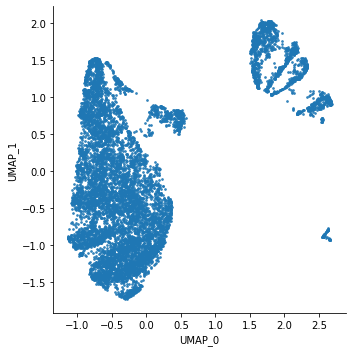

In [18]:
sns.lmplot( x="UMAP_0", y="UMAP_1",
  data=result, 
  fit_reg=False, 
  legend=False,  
  scatter_kws={"s": 3},palette="Set1") # specify the point size
plt.savefig('clusters_umap_all.png', dpi=700, bbox_inches='tight')

## For ordinal features we use canberra metric

In [19]:
data_embedded = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, metric='canberra', random_state=42).fit_transform(data_bf)
data_embedded[:,0]=(data_embedded[:,0]- np.mean(data_embedded[:,0]))/np.std(data_embedded[:,0])
data_embedded[:,1]=(data_embedded[:,1]- np.mean(data_embedded[:,1]))/np.std(data_embedded[:,1])
result_bf = pd.DataFrame(data = data_embedded , 
        columns = ['UMAP_0_of', 'UMAP_1_of'])

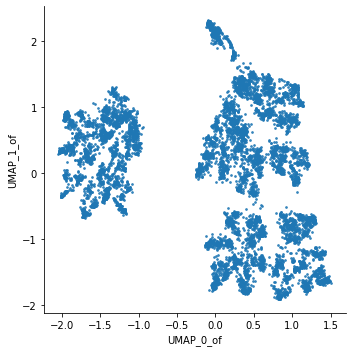

In [20]:
sns.lmplot( x="UMAP_0_of", y="UMAP_1_of",
  data=result_bf, 
  fit_reg=False, 
  legend=False,
  scatter_kws={"s": 3},palette="Set1") # specify the point size
plt.savefig('clusters_umap_of.png', dpi=700, bbox_inches='tight')

## For continuous features we use eulcidean metric

In [21]:
data_embedded = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, metric='euclidean', random_state=42).fit_transform(data_cf)
data_embedded.shape
data_embedded[:,0]=(data_embedded[:,0]- np.mean(data_embedded[:,0]))/np.std(data_embedded[:,0])
data_embedded[:,1]=(data_embedded[:,1]- np.mean(data_embedded[:,1]))/np.std(data_embedded[:,1])
result_cf = pd.DataFrame(data = data_embedded , 
        columns = ['UMAP_0_cf', 'UMAP_1_cf'])

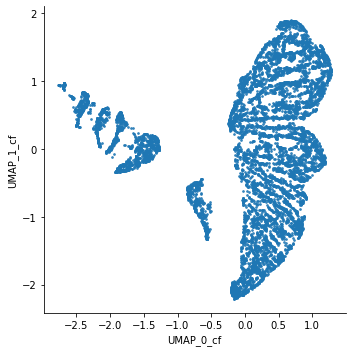

In [22]:
sns.lmplot( x="UMAP_0_cf", y="UMAP_1_cf",
  data=result_cf, 
  fit_reg=False, 
  legend=False,
  scatter_kws={"s": 3},palette="Set1") # specify the point size
plt.savefig('clusters_umap_cf.png', dpi=700, bbox_inches='tight')

## For nominal features we use hamming metric

In [23]:
data_embedded = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, metric='hamming', random_state=42).fit_transform(data_dnbf)
data_embedded.shape
data_embedded[:,0]=(data_embedded[:,0]- np.mean(data_embedded[:,0]))/np.std(data_embedded[:,0])
data_embedded[:,1]=(data_embedded[:,1]- np.mean(data_embedded[:,1]))/np.std(data_embedded[:,1])
result_dnbf = pd.DataFrame(data = data_embedded , 
        columns = ['UMAP_0_nf', 'UMAP_1_nf'])

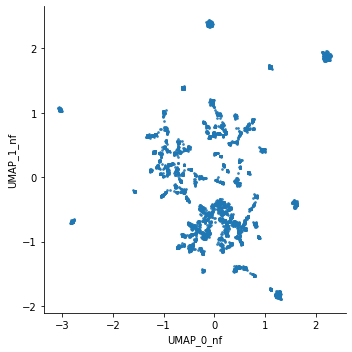

In [24]:
sns.lmplot( x="UMAP_0_nf", y="UMAP_1_nf",
  data=result_dnbf, 
  fit_reg=False, 
  legend=False,
  scatter_kws={"s": 3},palette="Set1") # specify the point size
plt.savefig('clusters_umap_nf.png', dpi=700, bbox_inches='tight')

Now we choose top two UMAP reduced dimensions for continuous and ordinal features and top one UMAP reduced dimension for nominal features. Thus we get a five dimensional representation of the data. 

In [25]:
result=pd.concat([result_bf, result_cf, result_dnbf.drop(['UMAP_1_nf'],axis=1)],axis=1)

## Reducing the 5 dimensional representation to two dimensions to observe clusters

In [26]:
data_embedded = umap.UMAP(n_neighbors=30, min_dist=0.001, n_components=2, metric='euclidean', random_state=42).fit_transform(result.as_matrix())
data_embedded.shape
result = pd.DataFrame(data = data_embedded , 
        columns = ['UMAP_0', 'UMAP_1'])

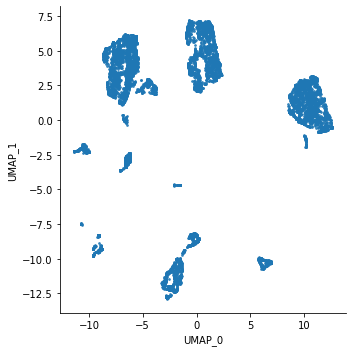

In [27]:
sns.lmplot( x="UMAP_0", y="UMAP_1",
  data=result, 
  fit_reg=False, 
  legend=False,
  scatter_kws={"s": 3},palette="Set1") # specify the point size
plt.savefig('clusters_umap_int.png', dpi=700, bbox_inches='tight')

In [28]:
result_mat=result.as_matrix()

## Extracting clusters using DBSCAN

In [29]:
dbscan = DBSCAN(eps=1.1, min_samples = 200)
clusters=dbscan.fit_predict(result.as_matrix())
(values,counts) = np.unique(clusters,return_counts=True)

In [30]:
counts

array([ 263, 2898, 2301,  228, 2226, 1315,  290,  243,  361], dtype=int64)

In [31]:
result['Cluster'] = clusters

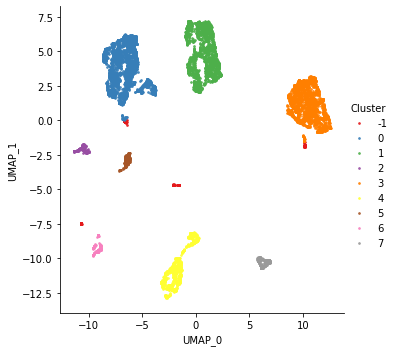

In [32]:
sns.lmplot( x="UMAP_0", y="UMAP_1",
  data=result, 
  fit_reg=False, 
  legend=True,
  hue='Cluster', # color by cluster
  scatter_kws={"s": 3},palette="Set1") # specify the point size
plt.savefig('clusters_umap_fin.png', dpi=700, bbox_inches='tight')

In [33]:
data['Clusters']=clusters

In [34]:
data.to_csv('clusters.csv',index=False)

In [35]:
values

array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64)

In [36]:
counts

array([ 263, 2898, 2301,  228, 2226, 1315,  290,  243,  361], dtype=int64)

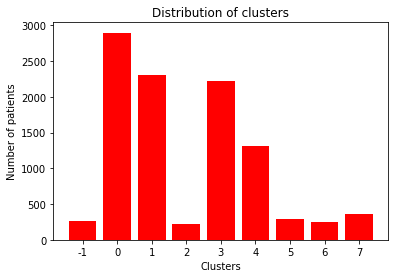

In [37]:
plt.bar(values,counts,tick_label=values,color='r')
plt.xlabel('Clusters')
plt.ylabel('Number of patients')
plt.title('Distribution of clusters')
plt.savefig('cluster_dist.png', dpi=1000, bbox_inches='tight')